# Matplotlib Diagrams
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [matplotlib_diagrams.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Visualization-Tools/matplotlib_diagrams.ipynb)
---
Examples of diagram visualization using *Matplotlib*.

<font color="#CC0000">[<b>PT-BR<b> content]</font>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

## 1. Diagramas
---
Exemplos de diagramas separados por tipos e utilizando dados criados aleatoriamente.

### 1.1. Rede
---
- **Descentralizado** [*decentralized network*]: Visualização de diagrama de rede descentralizada.
- **Distribuído** [*distributed network*]: Visualização de diagrama de rede distribuída, desenvolvida por meio do método de triangulação de *Delaunay*.

In [3]:
pn, cn = 64, 8
px = np.random.normal(0, 1, pn)
py = np.random.normal(0, 1, pn)
cx = np.random.normal(0, 1, cn)
cx = np.insert(cx, 0, 0)
cy = np.random.normal(0, 1, cn)
cy = np.insert(cy, 0, 0)
angulo = (np.arctan2(py, px) + np.pi)/(2*np.pi)

In [4]:
# Parâmetros de visualização
import matplotlib.tri as tri
distrib = tri.Triangulation(np.concatenate([px, cx]),
                            np.concatenate([py, cy]))
cmapRede = cm.get_cmap('hsv')

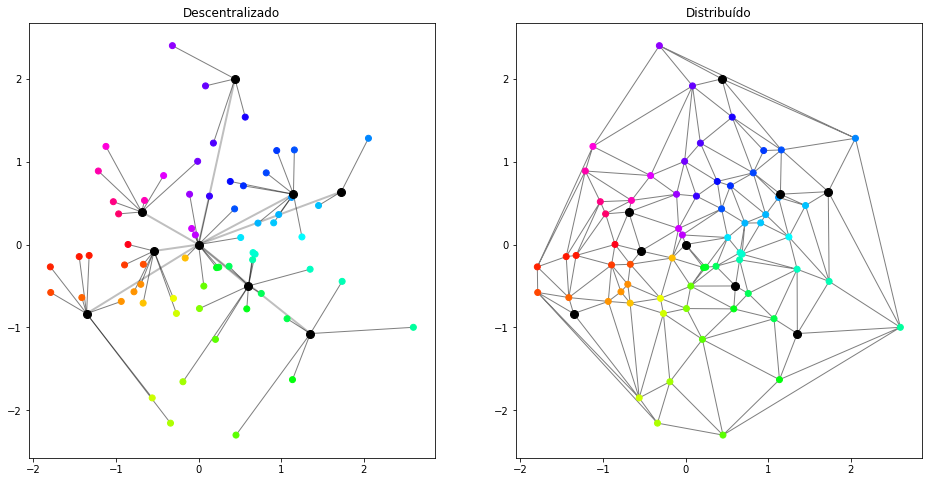

Wall time: 353 ms


In [5]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Descentralizado
for s, t in zip(px, py):
    dist = ((s - cx)**2 + (t - cy)**2)**0.5
    csel = dist <= dist.min()
    for u, v in zip(cx[csel], cy[csel]):
        axA.plot([s, u], [t, v], color='black', alpha=0.5,
                 linewidth=1, zorder=1)

for u, v in zip(cx, cy):
    if u or v:
        axA.plot([u, 0], [v, 0], color='black', alpha=0.25,
                 linewidth=2, zorder=1)

axA.scatter(px, py, c=cmapRede(angulo), zorder=2)
axA.scatter(cx, cy, color='black', s=64, zorder=2)
axA.set_title('Descentralizado')

# Distribuído
axB.triplot(distrib, color='black', alpha=0.5, linewidth=1, zorder=1)
axB.scatter(px, py, c=cmapRede(angulo), zorder=2)
axB.scatter(cx, cy, color='black', s=64, zorder=2)
axB.set_title('Distribuído')
plt.show()

### 1.2. Fluxo
---
- **Fluxo Horizontal** [*flow chart*]: Visualização de diagrama de fluxo horizontal.

In [6]:
# Dados para fluxo
colecao = np.array(list('αβγδε'))
n = len(colecao)
indices = np.arange(n)
sel = lambda x: np.random.choice(x, 16)
mapa = np.array([sel(np.delete(indices, i)) for i in indices])
rede = colecao[mapa]

In [7]:
# Parâmetros de visualização
from matplotlib.path import Path
import matplotlib.patches as patches
pontos = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
paleta = cm.get_cmap('gist_rainbow')

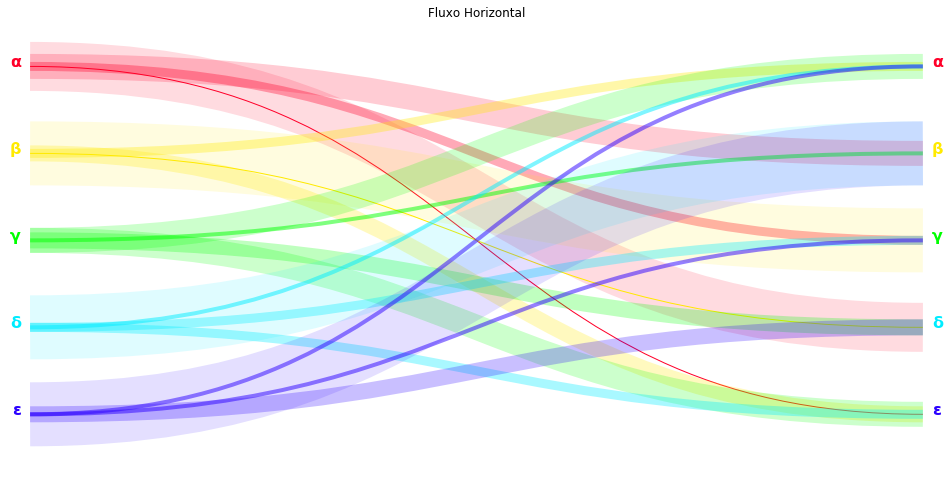

Wall time: 324 ms


In [8]:
%%time
fig, axA = plt.subplots(1, 1)

# Fluxo horizontal
getPy = lambda x: (1 - x/n) - 0.1
for i, e in enumerate(colecao):
    conx, cont = np.unique(rede[i], return_counts=True)
    yo = getPy(i)
    *cor, _ = paleta(i/n)
    axA.text(-0.01, yo, e, ha='right', color=cor,
             fontsize=16, fontweight='bold')
    axA.text(1.01, yo, e, ha='left', color=cor,
             fontsize=16, fontweight='bold')
    for cx, ct in zip(conx, cont):
        yi = getPy(np.where(colecao == cx)[0])
        verts = [(0.0, yo), (0.5, yo), (0.5, yi), (1, yi)]
        path = Path(verts, pontos)
        patch = patches.PathPatch(path, facecolor='none', edgecolor=cor,
                                  lw=ct**2, alpha=1/ct)
        axA.add_patch(patch)

axA.set_title('Fluxo Horizontal')
axA.axis('off')

plt.show()

### 1.3. Arco
---
- **Arco** [*arc diagram*]: Visualização de diagrama de arco.
- **Convergência radial** [*radial convergence*]: Visualização de diagrama de convergência radial ou diagrama de corda.

In [9]:
# Dados para arco
n = 17
indices = np.arange(n)
sel = lambda x: np.random.choice(x, n//4)
mapa = np.array([sel(np.delete(indices, i)) for i in indices])
rede = indices[mapa]

In [10]:
# Parâmetros de visualização
cmapArco = cm.get_cmap('rainbow')

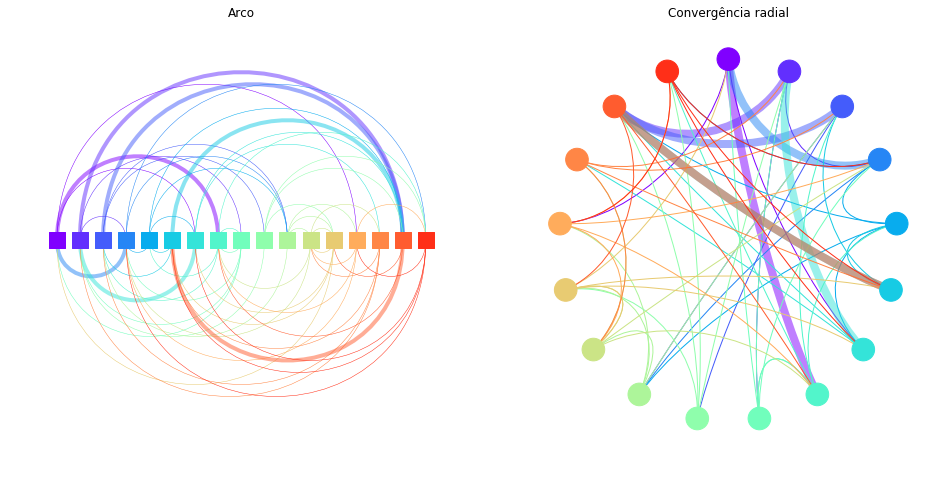

Wall time: 246 ms


In [11]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Arco
getPx = lambda x: x/(n - 1)
for i, e in enumerate(indices):
    conx, cont = np.unique(rede[i], return_counts=True)
    xo = getPx(i)
    *cor, _ = cmapArco(i/n)
    for cx, ct in zip(conx, cont):
        xi = getPx(np.where(indices == cx)[0])
        yoi= (xi - xo)*2**0.5
        verts = [(xo, 0), (xo, yoi), (xi, yoi), (xi, 0)]
        path = Path(verts, pontos)
        patch = patches.PathPatch(path, facecolor='none', edgecolor=cor,
                                  lw=0.5*ct**3, alpha=1/ct)
        axA.add_patch(patch)

axA.scatter(indices/(n - 1), indices*0, color=cmapArco(indices/n),
            marker='s', s=256, zorder=2)
axA.set_title('Arco')
axA.set_xlim([-0.05, 1.05])
axA.set_ylim([-1.2, 1.2])
axA.axis('off')

# Convergência radial
getTheta = lambda x: 2*np.pi*x/n
for i, e in enumerate(indices):
    conx, cont = np.unique(rede[i], return_counts=True)
    thetao = getTheta(i)
    xo = np.sin(thetao)
    yo = np.cos(thetao)
    *cor, _ = cmapArco(i/n)
    for cx, ct in zip(conx, cont):
        thetai = getTheta(np.where(indices == cx)[0])
        xi = np.sin(thetai)
        yi = np.cos(thetai)
        xm = (xo + xi)*0.5
        ym = (yo + yi)*0.5
        verts = [(xo, yo), ((xo + xm*0.25)*0.5, (yo + ym*0.25)*0.5),
                 ((xi + xm*0.25)*0.5, (yi + ym*0.25)*0.5), (xi, yi)]
        path = Path(verts, pontos)
        patch = patches.PathPatch(path, facecolor='none', edgecolor=cor,
                                  lw=ct**3, alpha=1/ct)
        axB.add_patch(patch)

axB.scatter(np.sin(getTheta(indices)), np.cos(getTheta(indices)),
            color=cmapArco(indices/n), s=512, zorder=2)
axB.set_title('Convergência radial')
axB.set_xlim([-1.2, 1.2])
axB.set_ylim([-1.2, 1.2])
axB.axis('off')

plt.show()